In [1]:
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium import webdriver
from bs4 import BeautifulSoup
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
from datetime import datetime
import time
import pandas as pd
import cx_Oracle

font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False

from IPython import display

import json
import re

In [77]:
custom_header ={
    'referer' : 'https://upbit.com/exchange?code=CRIX.UPBIT.KRW-BTC',  
    'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
}

url = 'https://crix-api-cdn.upbit.com/v1/crix/candles/lines?code=CRIX.UPBIT.KRW-BTC'

requests.get
req = requests.get(url, headers = custom_header)
# req = requests.get(url)

In [78]:
# https://crix-api-cdn.upbit.com/v1/crix/candles/minutes/30?code=CRIX.UPBIT.KRW-BTC

In [79]:
print(req.status_code)
if req.status_code == requests.codes.ok:
    print("접속 성공")
    realtime_data = json.loads(req.text)
    print(realtime_data)

200
접속 성공
{'unit': 15, 'businessTime': {'opening': '00:00:00', 'closing': '23:59:59'}, 'prevClosingPrice': 21201000.0, 'candles': [{'candleDateTime': '2022-12-30T07:45:00+00:00', 'candleDateTimeKst': '2022-12-30T16:45:00+09:00', 'openingPrice': 20855000.0, 'highPrice': 20861000.0, 'lowPrice': 20838000.0, 'tradePrice': 20859000.0, 'candleAccTradeVolume': 17.72122254, 'candleAccTradePrice': 369444438.25002, 'timestamp': 1672386735884, 'code': 'CRIX.UPBIT.KRW-BTC', 'unit': 15}, {'candleDateTime': '2022-12-30T07:30:00+00:00', 'candleDateTimeKst': '2022-12-30T16:30:00+09:00', 'openingPrice': 20845000.0, 'highPrice': 20873000.0, 'lowPrice': 20828000.0, 'tradePrice': 20842000.0, 'candleAccTradeVolume': 112.34324519, 'candleAccTradePrice': 2341918874.45072, 'timestamp': 1672386297422, 'code': 'CRIX.UPBIT.KRW-BTC', 'unit': 15}, {'candleDateTime': '2022-12-30T07:15:00+00:00', 'candleDateTimeKst': '2022-12-30T16:15:00+09:00', 'openingPrice': 20945000.0, 'highPrice': 20947000.0, 'lowPrice': 208370

In [80]:
type(realtime_data)

dict

In [81]:
candles=realtime_data['candles']

In [82]:
trade_price=[]
for item in candles:
    each_data=[]
    each_data.append(item['tradePrice'])
    each_data.append(item['candleDateTimeKst'])
    each_data.append(item['timestamp'])
    each_data.append(item['candleAccTradeVolume'])
    trade_price.append(each_data)
    

In [83]:
trade_price

[[20859000.0, '2022-12-30T16:45:00+09:00', 1672386735884, 17.72122254],
 [20842000.0, '2022-12-30T16:30:00+09:00', 1672386297422, 112.34324519],
 [20847000.0, '2022-12-30T16:15:00+09:00', 1672385399315, 134.35401896],
 [20946000.0, '2022-12-30T16:00:00+09:00', 1672384499185, 100.55795506],
 [20966000.0, '2022-12-30T15:45:00+09:00', 1672383599686, 37.37086842],
 [21000000.0, '2022-12-30T15:30:00+09:00', 1672382699635, 37.86774407],
 [21003000.0, '2022-12-30T15:15:00+09:00', 1672381799664, 51.07034413],
 [21003000.0, '2022-12-30T15:00:00+09:00', 1672380899576, 125.40904035],
 [21011000.0, '2022-12-30T14:45:00+09:00', 1672379999202, 80.01898814],
 [21071000.0, '2022-12-30T14:30:00+09:00', 1672379099748, 31.22263103],
 [21101000.0, '2022-12-30T14:15:00+09:00', 1672378199152, 22.86953983],
 [21125000.0, '2022-12-30T14:00:00+09:00', 1672377286671, 27.99975142],
 [21103000.0, '2022-12-30T13:45:00+09:00', 1672376398979, 15.27085169],
 [21115000.0, '2022-12-30T13:30:00+09:00', 1672375494376, 18

=> 원하는 데이터를 받아오기 어려워 방식 변경 필요

---

HTML 파싱 방법으로 접근

In [2]:
url='https://upbit.com/exchange?code=CRIX.UPBIT.KRW-BTC'

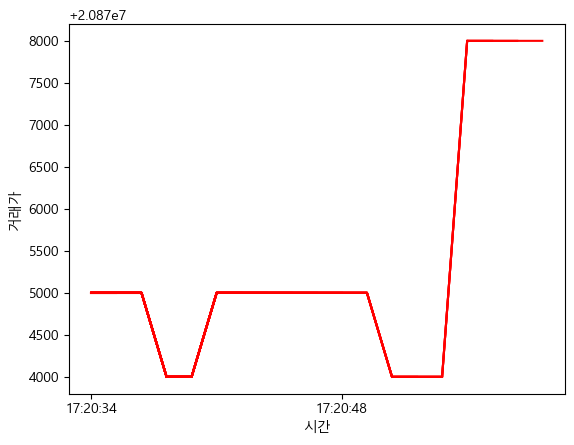

In [ ]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.maximize_window()
driver.implicitly_wait(3) 

# URL 접근
driver.get(url)

df = pd.DataFrame(columns={'시간','거래가'})

#
fig,ax = plt.subplots(1,1)
hdisplay = display.display("", display_id=True)

ax.set_xlabel('시간')
ax.set_ylabel('거래가')

t=0
tick = []

while True :
    html = driver.page_source
    
    soup=BeautifulSoup(html,'html.parser')
    a = soup.select_one("span.first strong").string
    a = a.replace(',','')

    a = int(a)
    now = datetime.now()
    
    df2 = pd.DataFrame({'시간' : [now.strftime('%H:%M:%S')] , '거래가' : [a]})

    #df = df.append(df2, ignore_index = True)
    
    if t % 10 == 0 :
        tick.append(t)
    
    df = pd.concat([df, df2], ignore_index = True )
    ax.plot(df['시간'],df['거래가'], color='r')
    plt.xticks(tick)
    plt.rcParams["figure.figsize"] = (14,4)
    
    hdisplay.update(fig)
    
    
    #print(df)
    t += 1
    time.sleep(1)
    

## Happy new year ♥